In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [52]:
import numpy as np

def vectorize(X):
    N_max = max([max(x) for x in X]) + 1
    Y = np.zeros([X.shape[0], N_max])
    for x, y in zip(X, Y):
        y[x] = 1.0
    return Y


X_train = vectorize(train_data)
X_test = vectorize(test_data)
y_train = train_labels.astype(float)
y_test = test_labels.astype(float)

X_val = X_train[:10000, :]
X_train_part = X_train[10000:, :]
y_val = y_train[:10000]
y_train_part = y_train[10000:]

In [54]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [55]:
history = model.fit(X_train_part,
                    y_train_part,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20


2023-11-06 20:21:30.210876: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 22ms/step - loss: 0.5266 - binary_accuracy: 0.7863 - val_loss: 0.3992 - val_binary_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3173 - binary_accuracy: 0.9023 - val_loss: 0.3406 - val_binary_accuracy: 0.8683
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2328 - binary_accuracy: 0.9240 - val_loss: 0.2806 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1816 - binary_accuracy: 0.9414 - val_loss: 0.2991 - val_binary_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1466 - binary_accuracy: 0.9535 - val_loss: 0.2920 - val_binary_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1199 - binary_accuracy: 0.9632 - val_loss: 0.3156 - val_binary_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0982 - binar

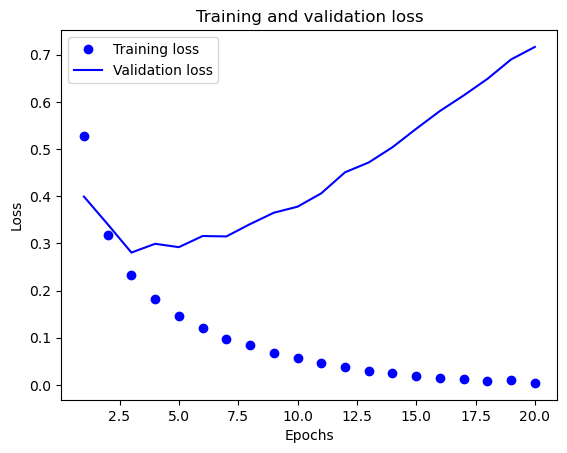

In [59]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

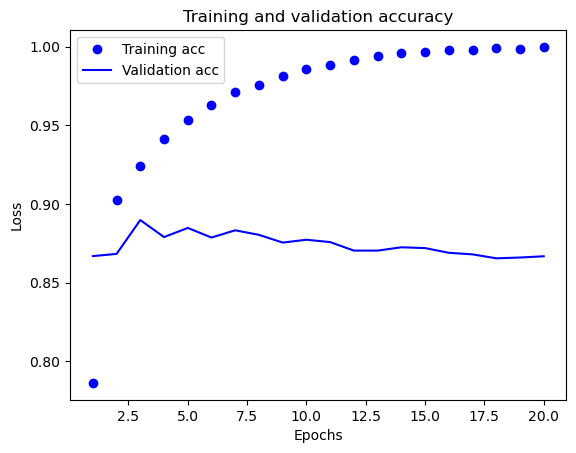

In [61]:
plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4365 - accuracy: 0.8282
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 1s 714us/step - loss: 0.3098 - accuracy: 0.8776


In [68]:
model.predict(X_test)

782/782 [==============================] - 0s 578us/step


array([[0.2473925 ],
       [0.99988526],
       [0.9586816 ],
       ...,
       [0.20672646],
       [0.11697844],
       [0.7483383 ]], dtype=float32)